In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
data = pd.read_csv("/Users/munkherdene/Desktop/digit-recognizer/train.csv")

In [24]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data = np.array(data)
m,n = data.shape 
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape


      
    

In [26]:
X_dev

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
def init_params():
    W1 = np.random.rand(10, 784) -0.5
    b1 = np.random.rand(10,1)-0.5
    W2 = np.random.rand(10, 10) -0.5
    b2 = np.random.rand(10,1)-0.5
    return W1,b1,W2,b2


In [38]:
def ReLu(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def forward_prop(W1,b1,W2,b2,X):
    Z1 = np.dot(W1,X)+b1
    A1 = ReLu(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def deriv_ReLu(Z):
    return Z>0
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m=Y.size
    one_hot_Y = one_hot(Y)
    
    dZ2 = 2*(A2-one_hot_Y)
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2)
    
    dZ1 = np.dot(W2.T,dZ2) *  deriv_ReLu(Z1)
    dW1 = 1/m * np.dot(dZ1,X.T)
    db1 = 1/m * np.sum(dZ1)
    
    return dW1,db1,dW2,db2
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1  
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2 
    
    return W1, b1, W2, b2
 

In [39]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
def gradient_descent(X,Y,iterations, alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i % 10 ==0:
            print("Iteration ", i)
            print("l:", get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2

In [40]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,500,0.1)

Iteration  0
[6 3 8 ... 3 6 6] [8 0 7 ... 6 1 8]
l: 0.12782926829268293
Iteration  10
[9 0 2 ... 0 9 4] [8 0 7 ... 6 1 8]
l: 0.30129268292682926
Iteration  20
[9 0 7 ... 6 1 1] [8 0 7 ... 6 1 8]
l: 0.4861951219512195
Iteration  30
[4 0 7 ... 6 1 2] [8 0 7 ... 6 1 8]
l: 0.5680975609756097
Iteration  40
[4 0 7 ... 6 1 2] [8 0 7 ... 6 1 8]
l: 0.6247073170731707
Iteration  50
[4 0 7 ... 6 1 2] [8 0 7 ... 6 1 8]
l: 0.6715365853658537
Iteration  60
[4 0 7 ... 6 1 8] [8 0 7 ... 6 1 8]
l: 0.7066829268292683
Iteration  70
[4 0 7 ... 6 1 8] [8 0 7 ... 6 1 8]
l: 0.732780487804878
Iteration  80
[4 0 7 ... 6 1 8] [8 0 7 ... 6 1 8]
l: 0.7539268292682927
Iteration  90
[4 0 7 ... 6 1 8] [8 0 7 ... 6 1 8]
l: 0.770219512195122
Iteration  100
[4 0 7 ... 6 1 8] [8 0 7 ... 6 1 8]
l: 0.7818780487804878
Iteration  110
[4 0 7 ... 6 1 8] [8 0 7 ... 6 1 8]
l: 0.7919512195121952
Iteration  120
[4 0 7 ... 6 1 8] [8 0 7 ... 6 1 8]
l: 0.8003170731707318
Iteration  130
[4 0 7 ... 6 1 8] [8 0 7 ... 6 1 8]
l: 0.807170

In [41]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4 4 4 ... 4 4 4]
Label:  8


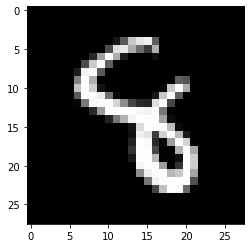

Prediction:  [1 1 1 ... 1 1 1]
Label:  1


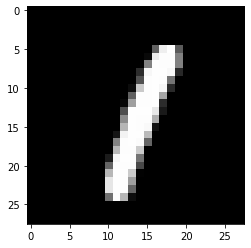

Prediction:  [3 3 3 ... 3 3 3]
Label:  3


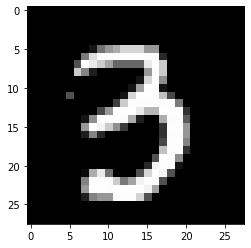

Prediction:  [0 5 5 ... 5 5 5]
Label:  0


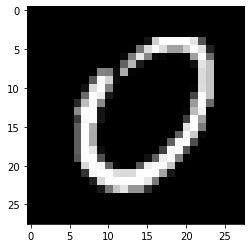

In [42]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)

In [121]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 5 3 4 9 1 1 8 8 0 1 6 5 6 4 2 5 8 6 5 3 4 4 2 6 7 2 8 4 3 6 2 3 8 9 6 7
 2 5 5 0 9 6 7 9 8 8 5 7 9 1 1 1 6 9 5 6 8 7 0 1 0 7 9 0 2 6 4 7 8 6 4 3 3
 8 5 7 9 5 9 6 2 4 3 1 3 6 3 3 2 7 9 7 5 7 4 0 0 0 4 9 0 4 8 6 3 6 8 3 1 8
 4 6 8 8 0 7 0 1 4 5 9 9 4 4 1 5 8 2 1 1 6 0 0 3 4 3 4 4 4 2 0 1 5 4 9 5 5
 6 0 8 8 3 5 7 8 9 7 7 8 9 4 2 3 2 7 1 6 2 8 1 5 2 6 3 8 5 2 1 0 4 3 0 3 2
 3 4 1 7 7 3 9 3 2 6 1 0 1 6 8 9 4 5 7 4 8 5 0 2 8 6 0 7 9 2 4 1 5 0 6 3 1
 0 5 9 8 7 1 4 9 2 4 1 9 4 2 5 0 2 1 1 7 9 6 6 6 5 7 7 9 4 6 1 4 5 4 9 9 8
 9 7 1 0 4 2 6 5 7 3 2 1 7 3 9 3 7 1 7 1 4 3 4 3 6 0 3 4 1 1 6 4 6 7 9 5 7
 0 8 4 5 9 4 9 3 4 1 4 2 8 3 6 7 1 2 1 3 9 4 3 9 3 7 9 2 8 5 3 9 0 2 0 4 0
 9 6 2 2 8 9 0 5 5 1 3 6 7 1 4 5 2 9 5 1 5 6 2 2 3 4 6 8 3 3 8 7 7 8 0 5 5
 3 3 1 5 2 7 9 8 3 2 8 7 7 4 6 1 6 9 7 3 7 2 4 7 3 8 9 6 6 9 8 4 7 2 5 8 4
 0 1 4 9 0 3 1 6 2 1 8 0 2 1 9 9 6 1 6 7 8 3 7 0 0 8 2 4 8 1 5 9 0 7 1 6 0
 7 4 8 9 6 1 8 2 3 6 6 9 7 6 8 1 5 0 6 8 2 2 8 1 3 3 7 6 7 6 3 3 7 7 9 7 1
 1 9 2 2 5 2 8 9 8 4 7 3 

0.898